## Importing Dependencies




In [1]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Loading the Dataset

In [2]:
nlp = spacy.load("en_core_web_sm")

df = pd.read_csv("/content/Medium_articles.csv")

In [3]:
df.shape

(337, 6)

In [4]:
df.isnull().sum()

,0
author,0
claps,0
reading_time,0
link,0
title,0
text,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        337 non-null    object
 1   claps         337 non-null    object
 2   reading_time  337 non-null    int64 
 3   link          337 non-null    object
 4   title         337 non-null    object
 5   text          337 non-null    object
dtypes: int64(1), object(5)
memory usage: 15.9+ KB


In [6]:
df.describe()

,reading_time
count,337.000000
mean,9.700297
std,5.482855
min,2.000000
25%,6.000000
50%,8.000000
75%,13.000000
max,31.000000


In [7]:
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [9]:
df["cleaned_text"] = df["text"].apply(clean_text)

In [10]:
# Tokenization & Lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

df["lemmatized_text"] = df["cleaned_text"].apply(lemmatize_text)


In [11]:
df.to_csv("preprocessed_medium.csv", index=False)

In [12]:
import pandas as pd

df = pd.read_csv("preprocessed_medium.csv")
print(df.head())  # View first 5 rows


             author claps  reading_time  \
0        Justin Lee  8.3K            11   
1       Conor Dewey  1.4K             7   
2  William Koehrsen  2.8K            11   
3      Gant Laborde  1.3K             7   
4  Emmanuel Ameisen   935            11   

                                                link  \
0  https://medium.com/swlh/chatbots-were-the-next...   
1  https://towardsdatascience.com/python-for-data...   
2  https://towardsdatascience.com/automated-featu...   
3  https://medium.freecodecamp.org/machine-learni...   
4  https://blog.insightdatascience.com/reinforcem...   

                                               title  \
0  Chatbots were the next big thing: what happene...   
1  Python for Data Science: 8 Concepts You May Ha...   
2  Automated Feature Engineering in Python – Towa...   
3  Machine Learning: how to go from Zero to Hero ...   
4  Reinforcement Learning from scratch – Insight ...   

                                                text  \
0  Oh, how 

<ipython-input-13-09efa947f46a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=word_df, palette="Blues_r")


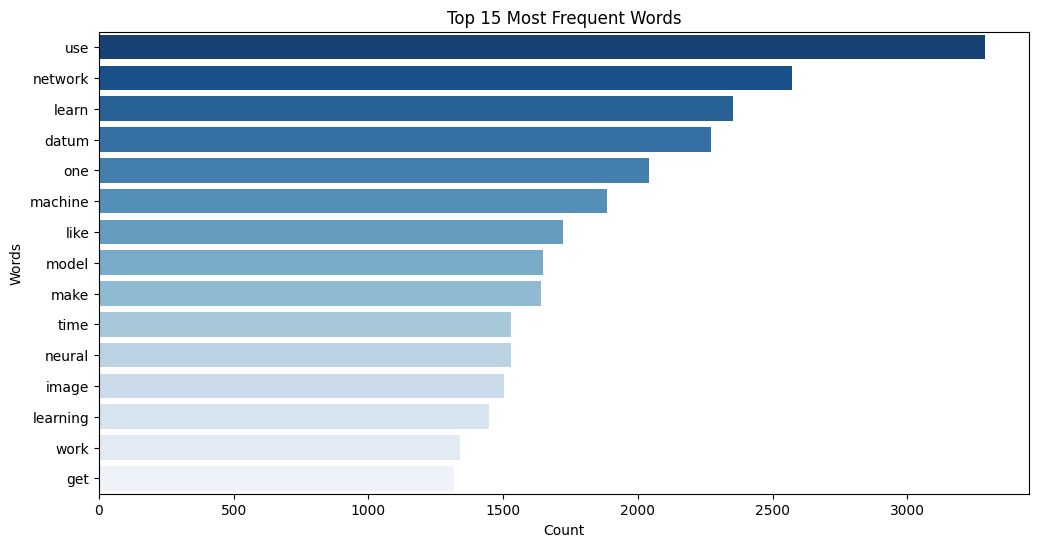

In [13]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("preprocessed_medium.csv")  # Load the dataset

# Combine all text into a single string
all_text = " ".join(df["lemmatized_text"].dropna())  # Ensure NaN values are removed


word_list = all_text.split()
from collections import Counter
import seaborn as sns

# Tokenize words
word_list = all_text.split()

# Count word frequency
word_freq = Counter(word_list)
most_common_words = word_freq.most_common(15)  # Top 15 words

# Convert to DataFrame for visualization
word_df = pd.DataFrame(most_common_words, columns=["Word", "Frequency"])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Word", data=word_df, palette="Blues_r")
plt.title("Top 15 Most Frequent Words")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()


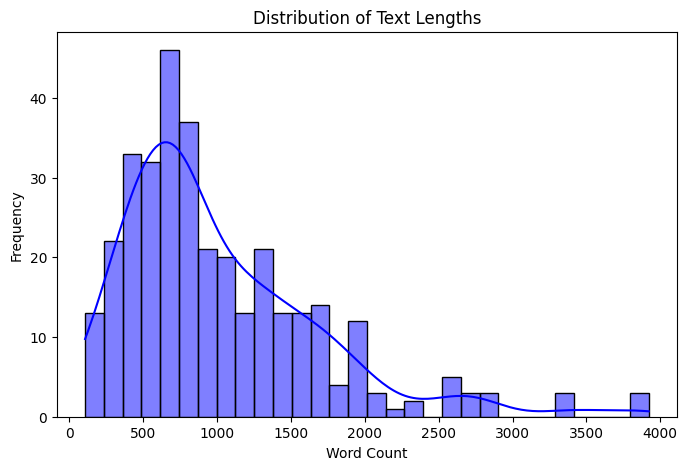

In [14]:
df["text_length"] = df["lemmatized_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df["text_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Text Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [15]:
import pandas as pd


df_raw = pd.read_csv("/content/Medium_articles.csv")
df_cleaned = pd.read_csv("/content/preprocessed_medium.csv")

print("Raw Data:")
print(df_raw.head())

print("\nCleaned Data:")
print(df_cleaned.head())


Raw Data:
             author claps  reading_time  \
0        Justin Lee  8.3K            11   
1       Conor Dewey  1.4K             7   
2  William Koehrsen  2.8K            11   
3      Gant Laborde  1.3K             7   
4  Emmanuel Ameisen   935            11   

                                                link  \
0  https://medium.com/swlh/chatbots-were-the-next...   
1  https://towardsdatascience.com/python-for-data...   
2  https://towardsdatascience.com/automated-featu...   
3  https://medium.freecodecamp.org/machine-learni...   
4  https://blog.insightdatascience.com/reinforcem...   

                                               title  \
0  Chatbots were the next big thing: what happene...   
1  Python for Data Science: 8 Concepts You May Ha...   
2  Automated Feature Engineering in Python – Towa...   
3  Machine Learning: how to go from Zero to Hero ...   
4  Reinforcement Learning from scratch – Insight ...   

                                                text  
0 

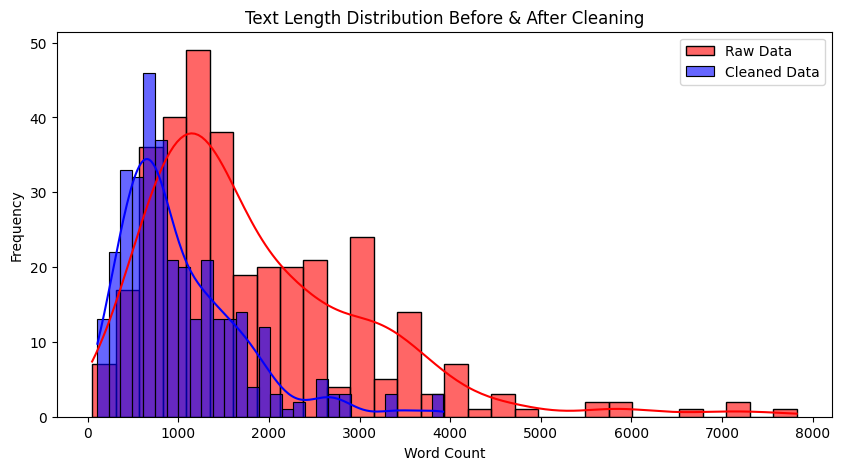

In [16]:
import seaborn as sns

# Calculate word count for each text entry
df_raw["text_length"] = df_raw["text"].dropna().apply(lambda x: len(x.split()))
df_cleaned["text_length"] = df_cleaned["lemmatized_text"].dropna().apply(lambda x: len(x.split()))

# Plot comparison
plt.figure(figsize=(10, 5))
sns.histplot(df_raw["text_length"], bins=30, kde=True, color="red", label="Raw Data", alpha=0.6)
sns.histplot(df_cleaned["text_length"], bins=30, kde=True, color="blue", label="Cleaned Data", alpha=0.6)
plt.title("Text Length Distribution Before & After Cleaning")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [17]:
df_cleaned.shape

(337, 9)

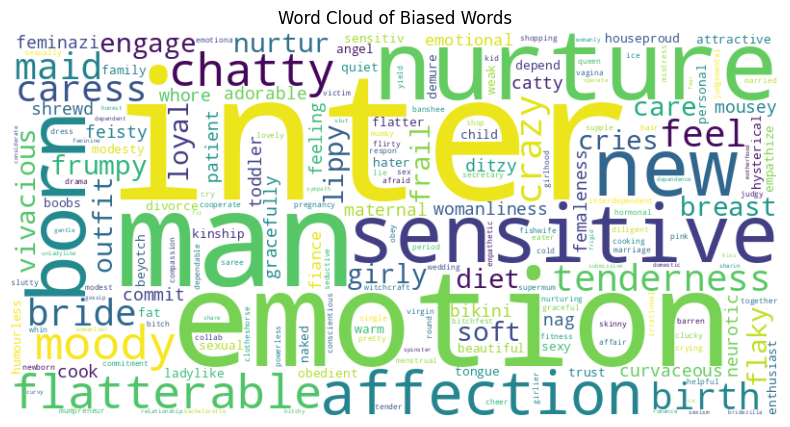

In [18]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load the JSON file
json_path = "word_dictionaries.json"
with open(json_path, "r") as file:
    data = json.load(file)

# Extract biased words
biased_words = data.get("female_bias_words", [])

# Count word frequencies
word_counts = Counter(biased_words)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(biased_words))

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Biased Words")
plt.show()




In [19]:
import json
import pandas as pd

# Load the dataset
df = pd.read_csv("preprocessed_medium.csv")

# Load biased words from JSON
json_path = "word_dictionaries.json"
with open(json_path, "r") as file:
    data = json.load(file)

# Extract biased words
biased_words = set(data.get("female_bias_words", []))

# Check first 10 biased words
print("Sample Biased Words:", list(biased_words)[:10])


Sample Biased Words: ['chatty', 'compassionate', 'together', 'dress', 'judgy', 'nag', 'modesty', 'pretty', 'affection', 'attractive']


In [20]:
df.shape

(337, 8)

In [21]:
# Function to count biased words in an article
def count_biased_words(text):
    words = text.lower().split()  # Tokenize text
    biased_count = sum(1 for word in words if word in biased_words)
    return biased_count

# Apply function to dataset
df["biased_word_count"] = df["lemmatized_text"].apply(count_biased_words)

# Save results
df.to_csv("bias_detected_medium.csv", index=False)

# Show sample results
df[["title", "biased_word_count"]].head(10)


,title,biased_word_count
0,Chatbots were the next big thing: what happene...,24
1,Python for Data Science: 8 Concepts You May Ha...,11
2,Automated Feature Engineering in Python – Towa...,29
3,Machine Learning: how to go from Zero to Hero ...,14
4,Reinforcement Learning from scratch – Insight ...,13
5,Intuitively Understanding Convolutions for Dee...,42
6,An intro to Machine Learning for designers – U...,12
7,The Big List of DS/ML Interview Resources – To...,11
8,Must know Information Theory concepts in Deep ...,3
9,What I learned from interviewing at multiple A...,43


In [22]:
df.columns

Index(['author', 'claps', 'reading_time', 'link', 'title', 'text',
       'cleaned_text', 'lemmatized_text', 'biased_word_count'],
      dtype='object')

<ipython-input-23-5350598d7585>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="biased_word_count", y="title", data=top_biased_articles, palette="Reds_r")


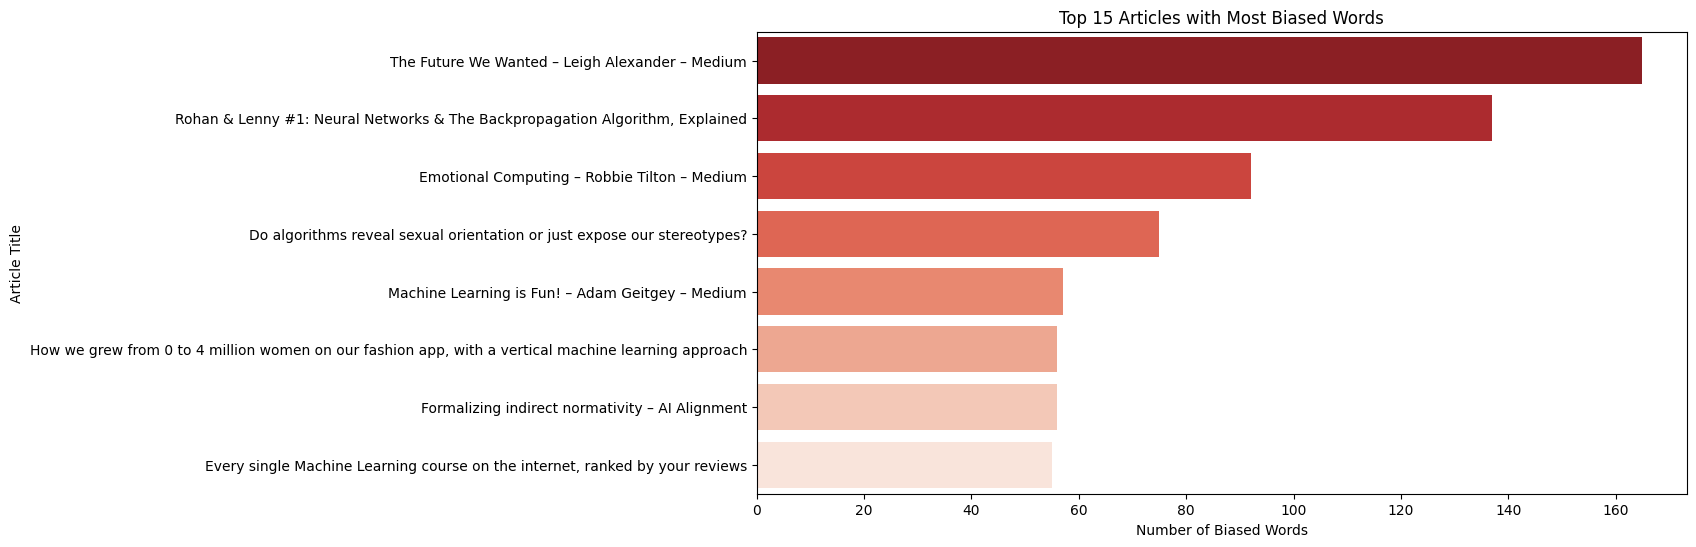

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort articles by bias count
top_biased_articles = df.sort_values(by="biased_word_count", ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="biased_word_count", y="title", data=top_biased_articles, palette="Reds_r")
plt.xlabel("Number of Biased Words")
plt.ylabel("Article Title")
plt.title("Top 15 Articles with Most Biased Words")
plt.show()


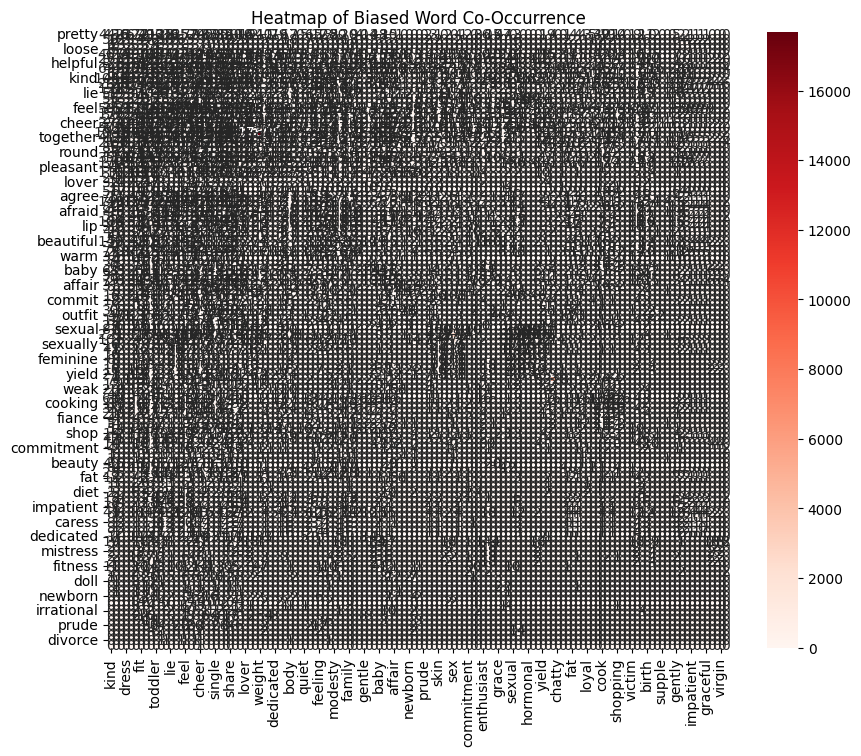

In [24]:
import numpy as np
import seaborn as sns

# Create a co-occurrence matrix for biased words
from collections import defaultdict
from itertools import combinations

# Initialize matrix
co_occurrence = defaultdict(lambda: defaultdict(int))

# Populate matrix
for text in df["lemmatized_text"].dropna():
    words = [word for word in text.lower().split() if word in biased_words]
    for w1, w2 in combinations(words, 2):
        co_occurrence[w1][w2] += 1
        co_occurrence[w2][w1] += 1  # Ensure symmetry

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence).fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_df, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Biased Word Co-Occurrence")
plt.show()


In [25]:
df.columns

Index(['author', 'claps', 'reading_time', 'link', 'title', 'text',
       'cleaned_text', 'lemmatized_text', 'biased_word_count'],
      dtype='object')

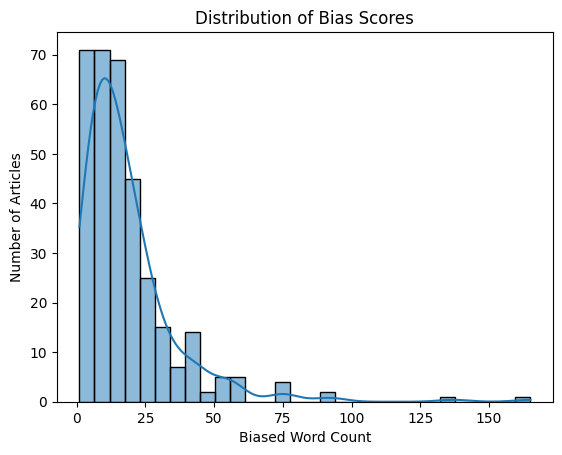

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["biased_word_count"], bins=30, kde=True)
plt.xlabel("Biased Word Count")
plt.ylabel("Number of Articles")
plt.title("Distribution of Bias Scores")
plt.show()


In [27]:
threshold = df["biased_word_count"].quantile(0.75)
print("Threshold based on 75th percentile:", threshold)



Threshold based on 75th percentile: 22.0


In [28]:
df["bias_label"] = df["biased_word_count"].apply(lambda x: "Biased" if x >= 22 else "Not Biased")


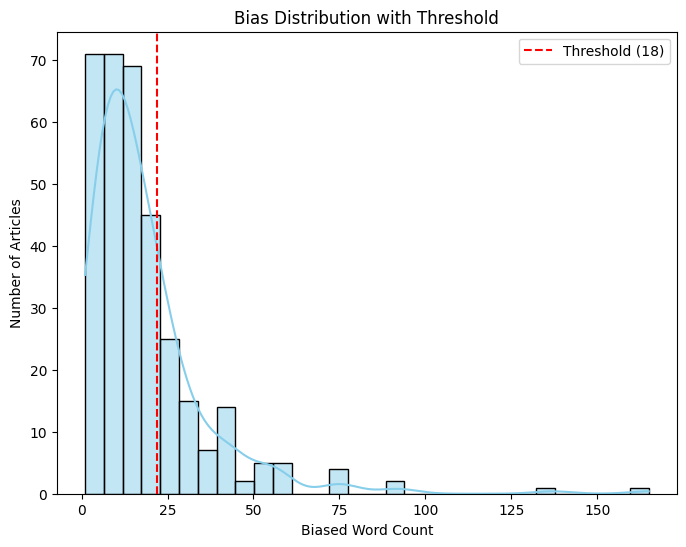

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df["biased_word_count"], bins=30, kde=True, color="skyblue")
plt.axvline(22, color="red", linestyle="dashed", label="Threshold (18)")
plt.xlabel("Biased Word Count")
plt.ylabel("Number of Articles")
plt.title("Bias Distribution with Threshold")
plt.legend()
plt.show()


In [30]:
df.columns

Index(['author', 'claps', 'reading_time', 'link', 'title', 'text',
       'cleaned_text', 'lemmatized_text', 'biased_word_count', 'bias_label'],
      dtype='object')

########################

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Convert text into numerical values
X = vectorizer.fit_transform(df["lemmatized_text"]).toarray()
y = df["bias_label"]  # Target variable


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))




Accuracy: 0.8970588235294118
              precision    recall  f1-score   support

      Biased       1.00      0.36      0.53        11
  Not Biased       0.89      1.00      0.94        57

    accuracy                           0.90        68
   macro avg       0.95      0.68      0.74        68
weighted avg       0.91      0.90      0.88        68



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')
svm_model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(f"Accuracy = {acc:.4f}")
from sklearn.svm import SVC


Accuracy = 0.8971


In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [36]:
from transformers import pipeline

classifier = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")
result = classifier("She is a nurse, while he is a doctor.")
print(result)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': '3 stars', 'score': 0.3789702355861664}]


In [37]:
from transformers import pipeline

classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")
result = classifier("She is a nurse, while he is a doctor.")
print(result)


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.8901361227035522}]


In [38]:
from transformers import pipeline

classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-hate")
result = classifier("She is a nurse, while he is a doctor.")
print(result)

config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'non-hate', 'score': 0.8797037601470947}]


In [39]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")
text = "She is a nurse, while he is a doctor."
labels = ["biased", "neutral"]

result = classifier(text, candidate_labels=labels)
print(result)

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'sequence': 'She is a nurse, while he is a doctor.', 'labels': ['neutral', 'biased'], 'scores': [0.7684449553489685, 0.2315550297498703]}


In [40]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
text = "Men are usually doctors, while women are mostly nurses."

labels = ["biased", "neutral"]
result = classifier(text, candidate_labels=labels)
print(result)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


{'sequence': 'Men are usually doctors, while women are mostly nurses.', 'labels': ['biased', 'neutral'], 'scores': [0.8159962892532349, 0.18400374054908752]}


In [41]:


from transformers import pipeline

# Load the zero-shot classification model
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")

# List of sentences to analyze
sentences = [
    "She is a nurse, while he is a doctor.",
    "Men are usually doctors, while women are mostly nurses.",
    "Both men and women can be doctors or nurses.",
    "A mother should stay home to take care of the children.",
    "Fathers go to work, while mothers take care of the home."
]

# Labels for classification
labels = ["biased", "neutral"]

# Run classification on multiple sentences
results = [classifier(sentence, candidate_labels=labels) for sentence in sentences]

# Print results
threshold = 0.65  # Adjust this based on testing

for res in results:
    label = res['labels'][0] if res['scores'][0] > threshold else "Uncertain"
    print(f"Sentence: {res['sequence']}")
    print(f"Classification: {label} (Confidence: {res['scores'][0]:.2f})")
    print("-" * 50)

Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Sentence: She is a nurse, while he is a doctor.
Classification: neutral (Confidence: 0.77)
--------------------------------------------------
Sentence: Men are usually doctors, while women are mostly nurses.
Classification: Uncertain (Confidence: 0.52)
--------------------------------------------------
Sentence: Both men and women can be doctors or nurses.
Classification: neutral (Confidence: 0.90)
--------------------------------------------------
Sentence: A mother should stay home to take care of the children.
Classification: Uncertain (Confidence: 0.53)
--------------------------------------------------
Sentence: Fathers go to work, while mothers take care of the home.
Classification: Uncertain (Confidence: 0.62)
--------------------------------------------------


In [42]:
import joblib

# Save the ML model
joblib.dump(model, "bias_detection_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [2]:
from transformers import pipeline

# Save pipeline (BERT-based Zero-shot classifier)
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")
classifier.save_pretrained("deberta_bias_detector")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

Device set to use cuda:0


In [49]:
import os
os.environ["LANG"] = "C.UTF-8"
os.environ["LC_ALL"] = "C.UTF-8"


In [56]:
import shutil

shutil.make_archive("bias_model", 'zip', "bias_model")


'/content/bias_model.zip'

In [3]:
from google.colab import files
files.download("/content/bias_model.zip")


FileNotFoundError: Cannot find file: /content/bias_model.zip